[pass_maps] detect_passes: 79 Pässe erkannt.
Pässe erkannt: 79
Pass-Übersicht:
  total: 79
  completed: 58
  failed: 20
  clearances: 1


/Users/loubrauchli/Documents/Python_Projects/Project_Football_Analytics_FCHERRLIBERG/project/Computer-Vision-FCH/analytics/pass_maps.py:138: RuntimeWarning: All-NaN slice encountered
  if np.nanmax(kick_window) < speed_threshold:


AttributeError: 'NoneType' object has no attribute 'write'

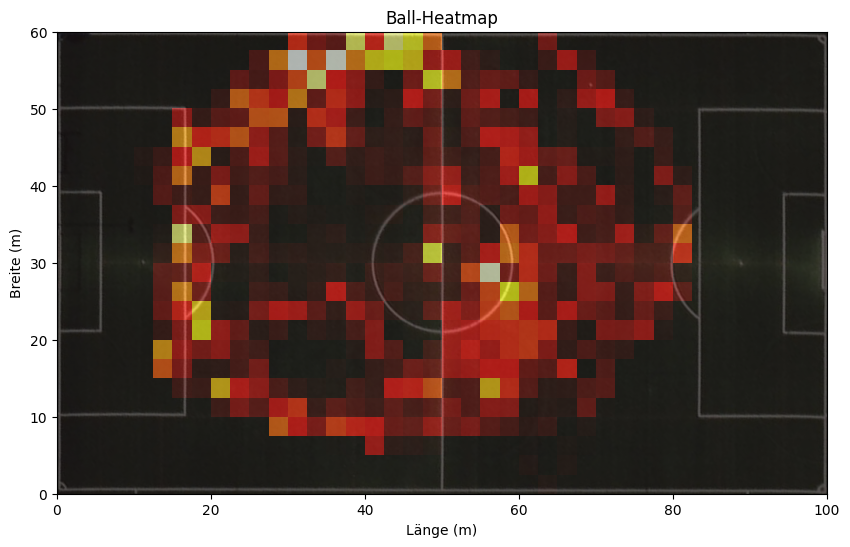

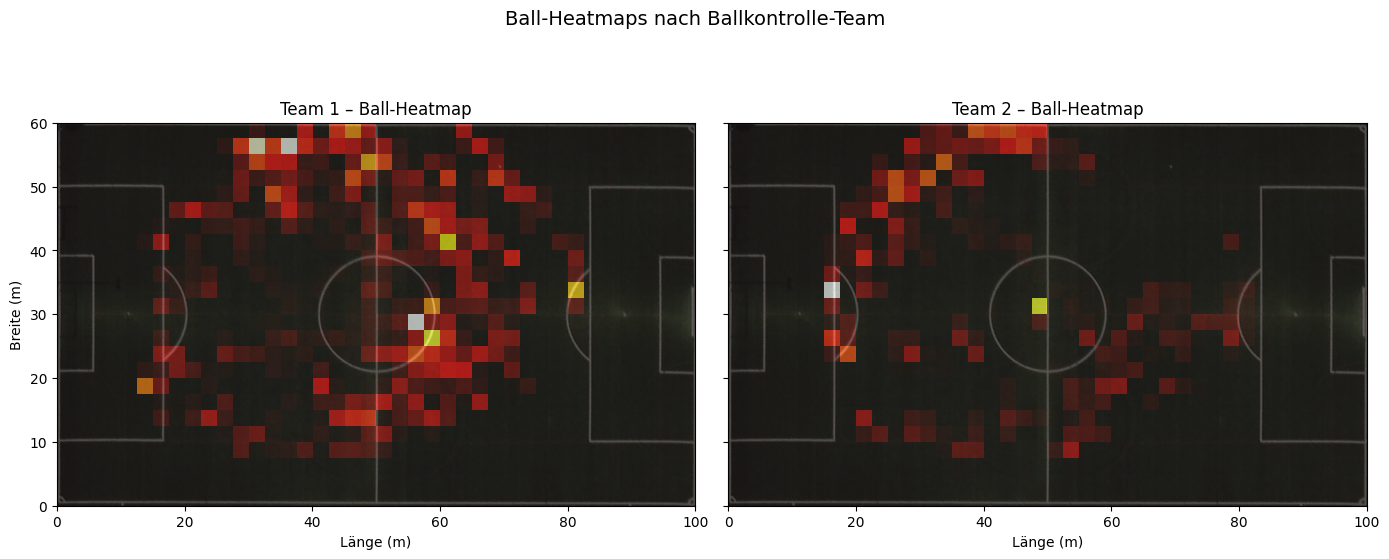

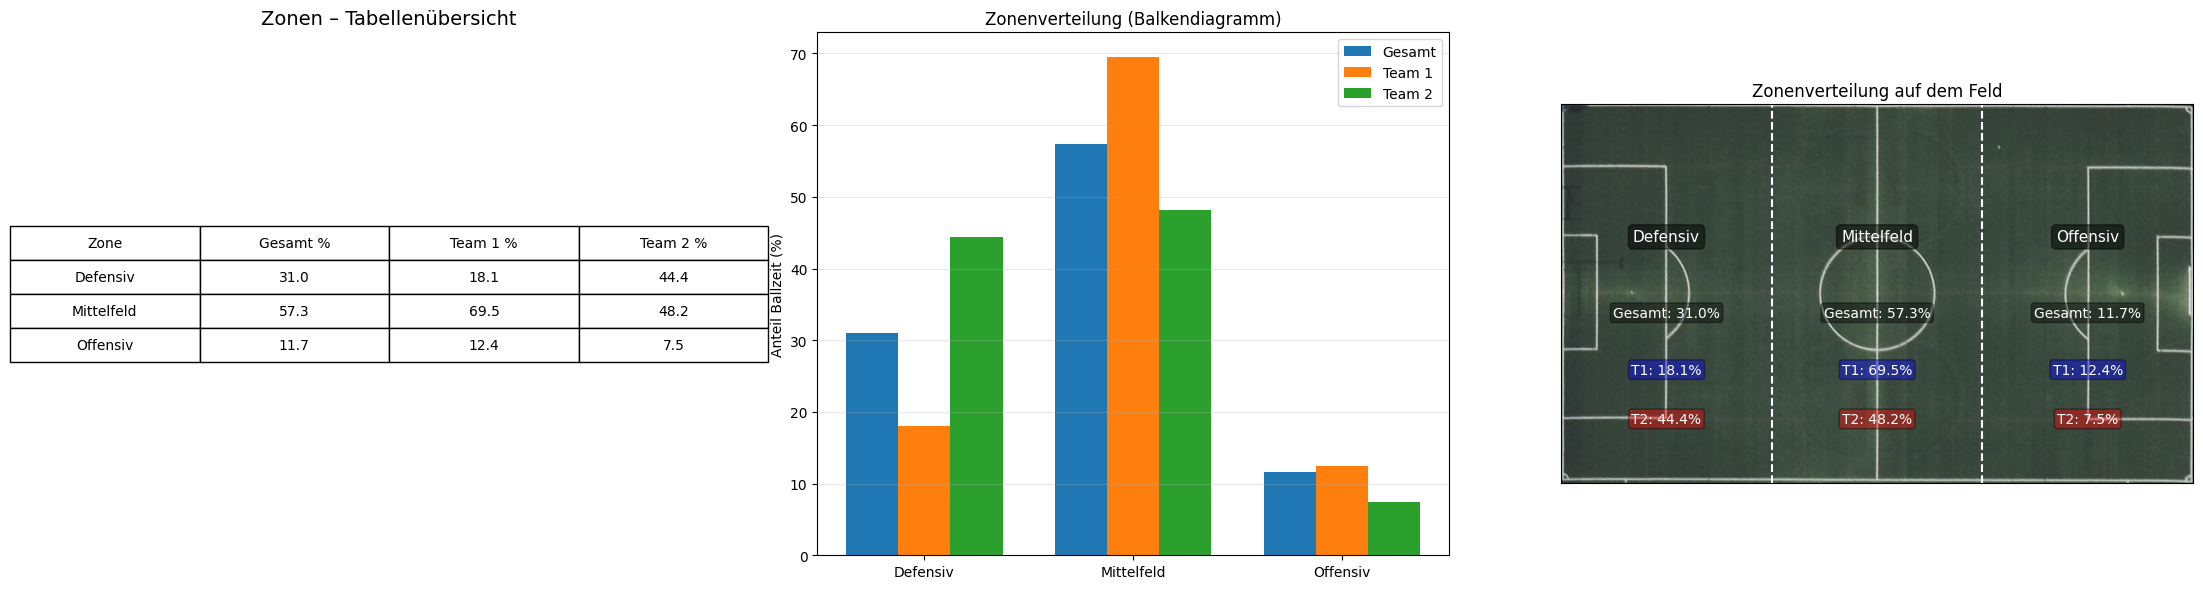

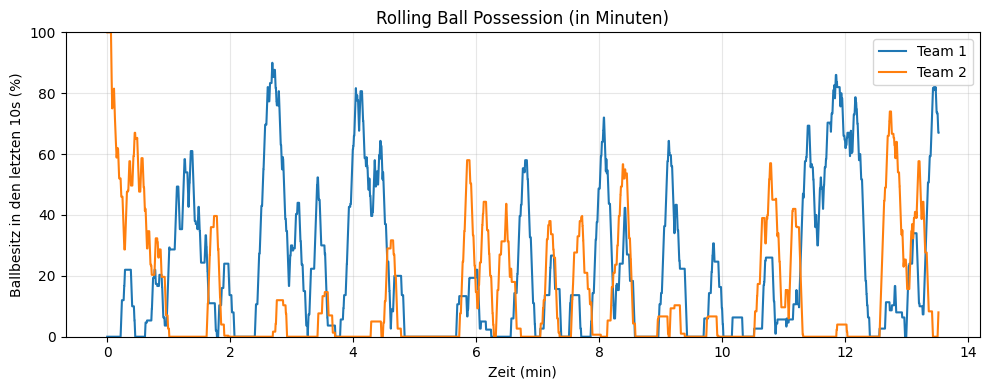

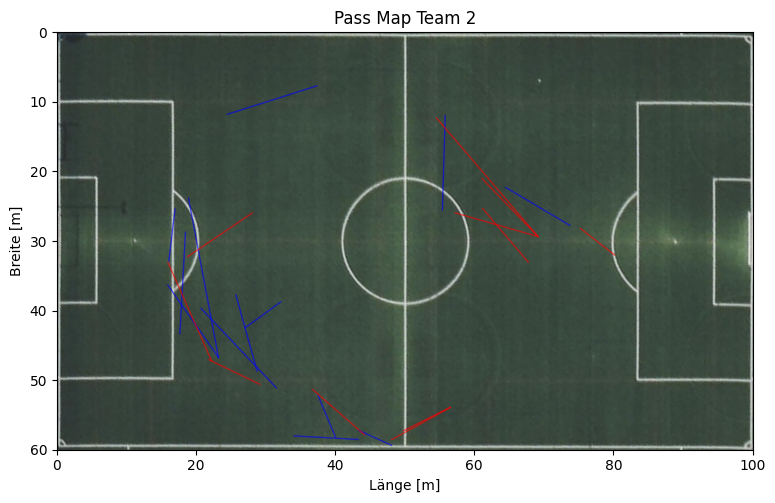

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
from config import Settings

from analytics.data_loading import load_frame_events
from analytics.heatmaps import (
    plot_ball_heatmap_on_pitch,
    plot_team_ball_heatmaps_on_pitch,
)
from analytics.zones import plot_zone_summary
from analytics.possession import plot_rolling_possession
from analytics.pass_maps import (
    detect_passes,
    classify_pass_types,
    plot_pass_map,
    create_pass_maps_from_csv,
)

settings = Settings()
analytics_cfg = settings.analytics

# Projekt-Root automatisch finden
PROJECT_ROOT = next(p for p in Path.cwd().parents if (p / "project/Computer-Vision-FCH").exists())

# CSV laden
csv = PROJECT_ROOT / settings.paths.frame_events_csv
df = pd.read_csv(csv)

# Pitch-Bild laden
pitch_path = PROJECT_ROOT / settings.paths.pitch_image
pitch_img = Image.open(pitch_path)

pitch_length = settings.analytics.pitch_length   # Meter
pitch_width = settings.analytics.pitch_width

# Basis-Analysen
plot_ball_heatmap_on_pitch(df, pitch_img, pitch_length, pitch_width)
plot_team_ball_heatmaps_on_pitch(df, pitch_img, pitch_length, pitch_width)
plot_zone_summary(df, pitch_img, pitch_length, pitch_width)
plot_rolling_possession(df, window_sec=10.0)

# Pässe erkennen
passes = detect_passes(
    df,
    fps=s.tracking.fps,
    speed_threshold=5.0,
    min_distance=5.0,
    min_possession_frames=s.analytics.pass_min_frames,
)

print("Pässe erkannt:", len(passes))

# Pass-Typen klassifizieren
passes = classify_pass_types(
    passes,
    pitch_length=pitch_length,
)

# kleine Statistik
num_total = len(passes)
num_clear = sum(1 for p in passes if p["type"] == "clearance")
num_completed = sum(1 for p in passes if p["type"] == "completed_pass")
num_failed = sum(1 for p in passes if p["type"] == "failed_pass")

print("Pass-Übersicht:")
print("  total:", num_total)
print("  completed:", num_completed)
print("  failed:", num_failed)
print("  clearances:", num_clear)

# Pass-Maps direkt im Notebook anzeigen

create_pass_maps_from_csv(
    csv_path=str(settings.paths.frame_events_csv),
    out_path_team1=None,
    out_path_team2=None,
    pitch_length=analytics_cfg.pitch_length,
    pitch_width=analytics_cfg.pitch_width,
    fps=settings.tracking.fps,
    speed_threshold=analytics_cfg.pass_speed_threshold,
    min_distance=analytics_cfg.pass_min_distance,
    pitch_image_path=str(settings.paths.pitch_image),
)



[pass_maps] detect_passes: 84 Pässe erkannt.
[pass_maps] Summary: total=84, completed=63, failed=20, clearances=1


/Users/loubrauchli/Documents/Python_Projects/Project_Football_Analytics_FCHERRLIBERG/project/Computer-Vision-FCH/analytics/pass_maps.py:138: RuntimeWarning: All-NaN slice encountered
  if np.nanmax(kick_window) < speed_threshold:


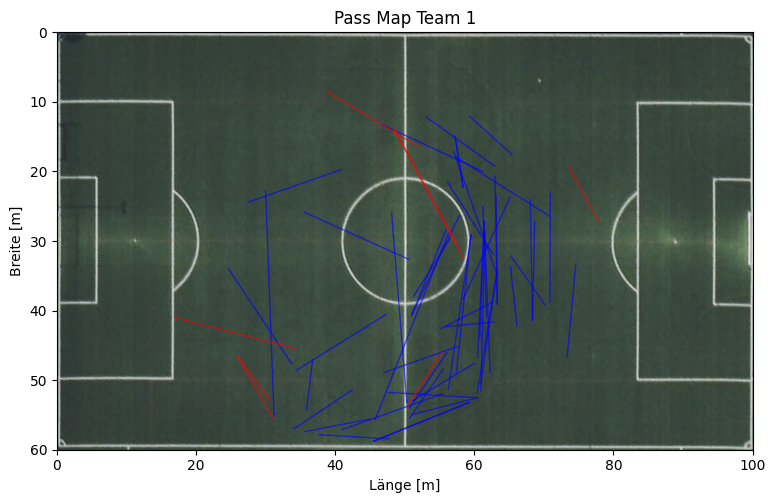

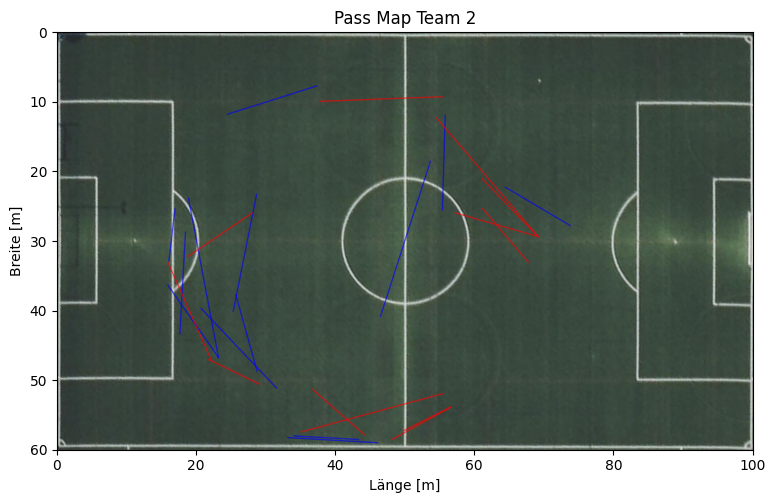